In [55]:
import sys
import pandas as pd

sys.path.append('../')
from src.functions import *

gs_uri = 'gs://videotron-ai-bucket/'
dataset_path = gs_uri + 'dataset/'

In [2]:
mep_df = pd.read_csv(dataset_path + 'MEP_Videotron.csv', low_memory=False)

In [3]:
incidents_old_df =  pd.read_csv(dataset_path + 'IncidentsCTT20170930_2.csv', low_memory=False)

In [4]:
columns_to_keep = ['ID', 'Submit_Date', 'Priority', 'Impact', 'Urgency']

incidents_old_df = incidents_old_df.rename(columns={'Incident_Number': 'ID',
                        'Priority_value': 'Priority',
                        'Impact_value': 'Impact',
                        'Urgency_value': 'Urgency'})[columns_to_keep]

In [5]:
incidents_new_df =  pd.read_csv(dataset_path + 'incmep20200301a20201210.csv',
                                header=None,
                                names=mep_df.columns,
                                low_memory=False)
incidents_new_df

,ID,Submit_Date,ScheduledStartDate,ScheduledEndDate,ActualStartDate,ActualEndDate,Risk_Level,ChangeType,Urgency,Impact,Priority
0,INC000003205030,2020-07-07 01:21:11.000,NaN,NaN,NaN,NaN,NaN,NaN,4000,1000,2
1,INC000003205031,2020-07-07 01:29:16.000,NaN,NaN,NaN,NaN,NaN,NaN,4000,4000,3
2,INC000003205032,2020-07-07 01:32:53.000,NaN,NaN,NaN,NaN,NaN,NaN,3000,4000,2
3,INC000003205033,2020-07-07 01:55:59.000,NaN,NaN,NaN,NaN,NaN,NaN,4000,1000,2
4,INC000003178114,2020-06-01 15:49:11.000,NaN,NaN,NaN,NaN,NaN,NaN,3000,3000,2
...,...,...,...,...,...,...,...,...,...,...,...
183601,CRQ000000035859,2020-11-30 11:14:37.000,2020-11-30 14:00:00.000,2020-11-30 15:00:00.000,2020-11-30 14:00:00.000,2020-11-30 14:49:00.000,0.0,2000.0,4000,4000,3
183602,CRQ000000035745,2020-11-30 11:19:46.000,2020-12-03 22:00:00.000,2020-12-03 23:59:00.000,NaN,NaN,1.0,2000.0,4000,4000,3
183603,CRQ000000035860,2020-11-30 11:30:19.000,2020-12-01 22:00:00.000,2020-12-02 00:00:00.000,2020-12-01 22:16:00.000,2020-12-01 22:45:00.000,1.0,2000.0,2000,4000,2
183604,CRQ000000035862,2020-11-30 11:37:52.000,2020-12-03 08:00:00.000,2020-12-03 09:00:00.000,2020-12-03 08:00:00.000,2020-12-04 08:10:00.000,1.0,2000.0,2000,4000,2


### Concat all the dataset together

In [6]:
tickets_df = pd.concat([mep_df, incidents_new_df, incidents_old_df])
tickets_df = tickets_df.reset_index(drop=True)

### Replace values

In [7]:
replace_value_list = [(1000, '1-Critical'), (2000, '2-High'), (3000, '3-Medium'), (4000, '4-Low')]

for (val1, val2) in replace_value_list:
    tickets_df['Urgency'].replace(val1, val2, inplace=True)

In [8]:
replace_value_list = [(1000, '1-Extensive/Widespread'), (2000, '2-Significant/Large'), (3000, '3-Moderate/Limited'), (4000, '4-Minor/Localized')]

for (val1, val2) in replace_value_list:
    tickets_df['Impact'].replace(val1, val2, inplace=True)

In [9]:
replace_value_list = [(0, 'Critical'), (1, 'High'), (2, 'Medium'), (3, 'Low')]

for (val1, val2) in replace_value_list:
    tickets_df['Priority'].replace(val1, val2, inplace=True)

In [10]:
tickets_df

,ID,Submit_Date,ScheduledStartDate,ScheduledEndDate,ActualStartDate,ActualEndDate,Risk_Level,ChangeType,Urgency,Impact,Priority
0,MEP000000065955,2017-11-01 07:00:33.000,2017-11-01 09:00:00.000,2017-11-01 10:00:00.000,2017-11-01 09:00:00.000,2017-11-01 10:00:00.000,0.0,2000.0,3-Medium,3-Moderate/Limited,Medium
1,MEP000000065956,2017-11-01 08:00:37.000,2017-11-02 01:00:00.000,2017-11-02 06:00:00.000,2017-11-02 01:00:00.000,2017-11-02 06:00:00.000,0.0,2000.0,3-Medium,3-Moderate/Limited,Medium
2,MEP000000065957,2017-11-01 08:00:37.000,2017-11-08 01:00:00.000,2017-11-08 06:00:00.000,2017-11-08 01:00:00.000,2017-11-08 06:00:00.000,0.0,2000.0,3-Medium,3-Moderate/Limited,Medium
3,MEP000000065958,2017-11-01 09:00:43.000,2017-11-03 04:00:00.000,2017-11-03 06:00:00.000,2017-11-03 04:00:00.000,2017-11-03 05:00:00.000,0.0,2000.0,3-Medium,3-Moderate/Limited,Medium
4,MEP000000065959,2017-11-01 09:00:43.000,2017-11-01 08:30:00.000,2017-11-01 09:30:00.000,2017-11-01 08:30:00.000,2017-11-01 08:40:00.000,0.0,2000.0,3-Medium,3-Moderate/Limited,Medium
...,...,...,...,...,...,...,...,...,...,...,...
438210,INC000003136460,2020-04-01 11:17:48.000,NaN,NaN,NaN,NaN,NaN,NaN,4-Low,4-Minor/Localized,Low
438211,INC000003136454,2020-04-01 11:16:42.000,NaN,NaN,NaN,NaN,NaN,NaN,2-High,4-Minor/Localized,Medium
438212,INC000003136556,2020-04-01 11:18:11.000,NaN,NaN,NaN,NaN,NaN,NaN,4-Low,4-Minor/Localized,Low
438213,INC000003136455,2020-04-01 11:18:23.000,NaN,NaN,NaN,NaN,NaN,NaN,4-Low,4-Minor/Localized,Low


### Save dataset as csv file

In [17]:
tickets_df.to_csv(dataset_path + 'videotron_full_dataset.csv')

# Data analysis
## Labels analysis

In [14]:
label_row_cond = (tickets_df['ID'].str.startswith('INC'))

In [97]:
tickets_df['Submit_Date'] = pd.to_datetime(tickets_df['Submit_Date'])
tickets_df['ScheduledStartDate'] = pd.to_datetime(tickets_df['ScheduledStartDate'])

In [28]:
label_df = tickets_df.loc[label_row_cond]

In [48]:
agg_label_df = label_df.groupby([label_df['Submit_Date'].dt.date])['Submit_Date'].count()
agg_label_df.name = 'count'
agg_label_df = agg_label_df.reset_index()

In [52]:
agg_label_df['Submit_Date'].max()-agg_label_df['Submit_Date'].min()

datetime.timedelta(days=1166)

In [53]:
agg_label_df.shape

(1167, 2)

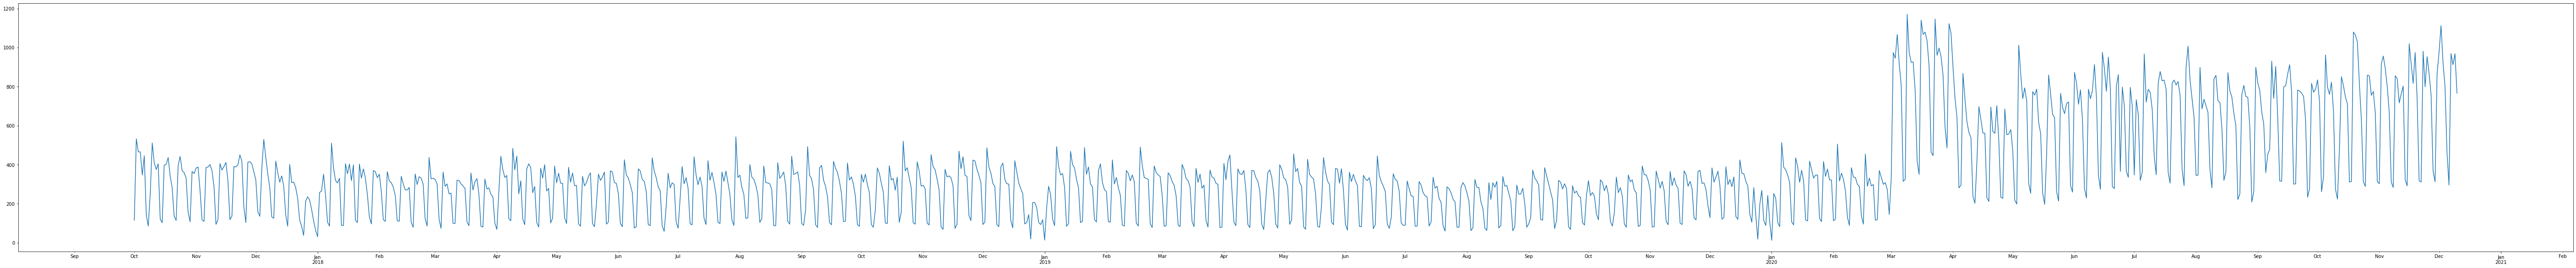

In [56]:
plot_label(agg_label_df['Submit_Date'], agg_label_df['count'])

In [81]:
agg_hour_label_df = label_df.groupby([label_df['Submit_Date'].dt.date, label_df['Submit_Date'].dt.hour])['Submit_Date'].count()
agg_hour_label_df.name = 'count'
agg_hour_label_df.index.names=['Date', 'Hour']
agg_hour_label_df = agg_hour_label_df.reset_index()

In [82]:
agg_hour_label_df

,Date,Hour,count
0,2017-10-01,7,5
1,2017-10-01,8,21
2,2017-10-01,9,9
3,2017-10-01,10,12
4,2017-10-01,11,10
...,...,...,...
21246,2020-12-10,12,60
21247,2020-12-10,13,81
21248,2020-12-10,14,70
21249,2020-12-10,15,62


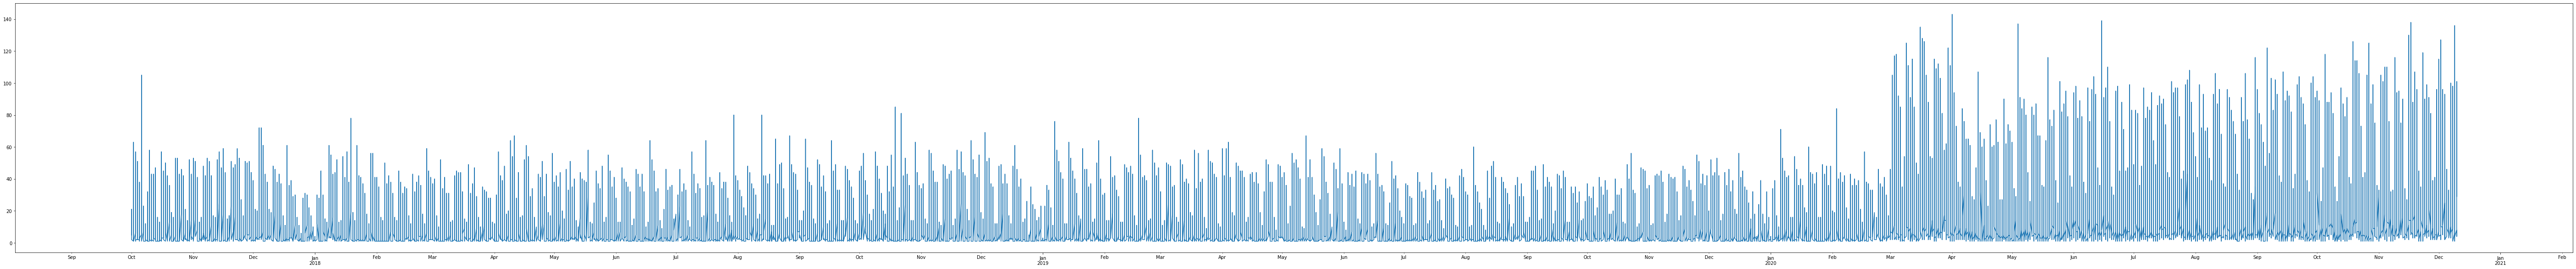

In [83]:
plot_label(agg_hour_label_df['Date'], agg_hour_label_df['count'])

## Feature data analysis

In [115]:
data_df = tickets_df.loc[~label_row_cond]

In [104]:
agg_data_df = data_df.groupby([data_df['ScheduledStartDate'].dt.date])['Submit_Date'].count()
agg_data_df.name = 'count'
agg_data_df = agg_data_df.reset_index()

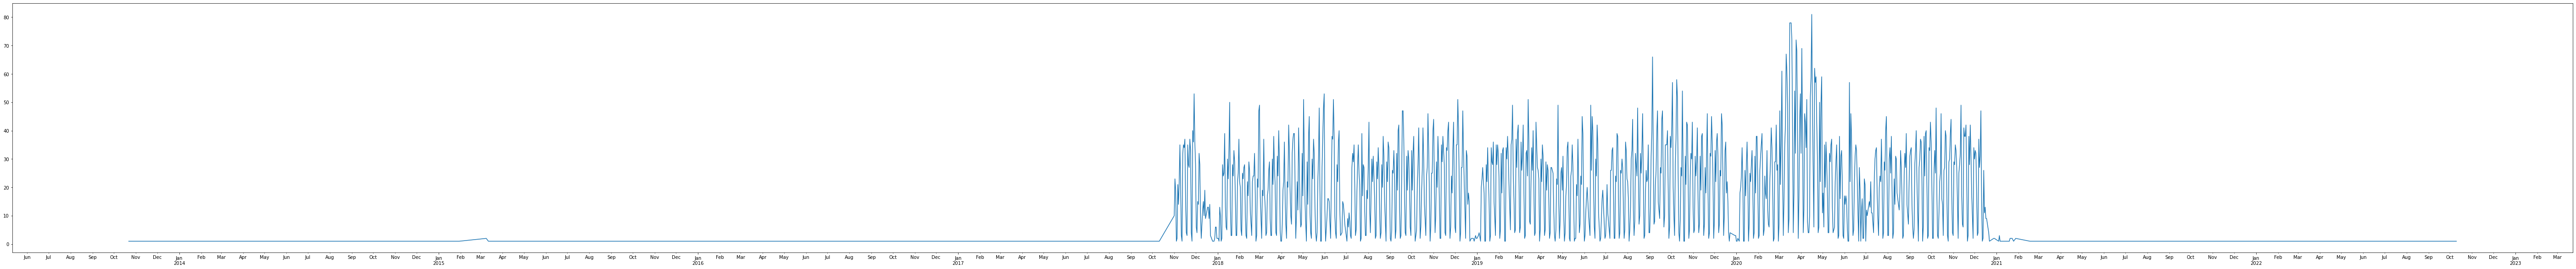

In [105]:
plot_label(agg_data_df['ScheduledStartDate'], agg_data_df['count'])

In [123]:
agg_hour_data_df = data_df.groupby([data_df['ScheduledStartDate'].dt.date, data_df['ScheduledStartDate'].dt.hour])['ScheduledStartDate'].count()
agg_hour_data_df.name = 'count'
agg_hour_data_df.index.names=['Date', 'Hour']
agg_hour_data_df = agg_hour_data_df.reset_index()

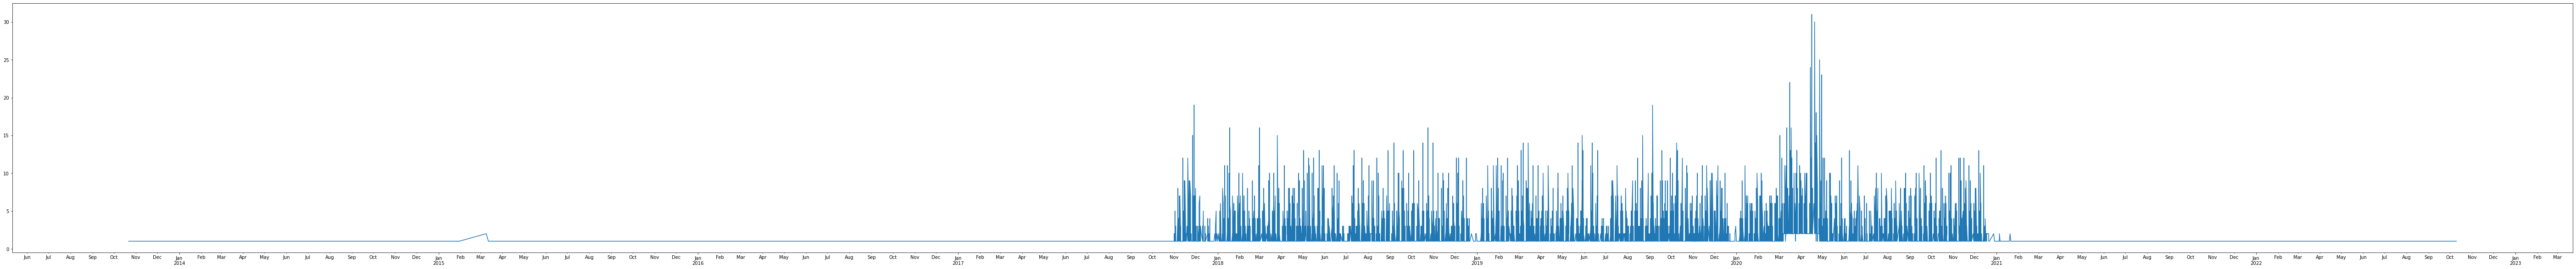

In [124]:
plot_label(agg_hour_data_df['Date'], agg_hour_data_df['count'])